# TensorFlow and Keras

In [1]:
#Uncomment and use it
#!pip install tensorflow

In [2]:
import tensorflow as tf
%matplotlib inline  

2025-04-26 10:07:11.273249: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 10:07:11.405885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-26 10:07:11.461772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-26 10:07:11.477564: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 10:07:11.577153: I tensorflow/core/platform/cpu_feature_guar

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [3]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


I0000 00:00:1745642234.319414    6673 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1745642234.434760    6673 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1745642234.439180    6673 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1745642234.447335    6673 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [4]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [5]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[3.5286503 3.9469285]
 [4.314019  5.3949637]
 [5.5208893 4.8260074]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [6]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [7]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.260366  ,  0.9499914 ],
       [ 0.12179112, -0.59038633]], dtype=float32)>


In [8]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

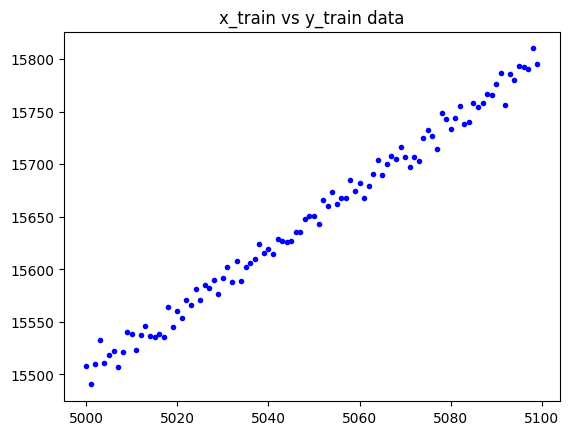

In [9]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [10]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.random.uniform(shape=(1,))) #(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001 #0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  173404912.0,  W : [[0.624145]], b  [0.17396174]
epoch : 1, loss  156169776.0,  W : [[0.7503521]], b  [0.17398673]
epoch : 2, loss  140647696.0,  W : [[0.8701231]], b  [0.17401046]
epoch : 3, loss  126668384.0,  W : [[0.98378617]], b  [0.17403297]
epoch : 4, loss  114078504.0,  W : [[1.0916529]], b  [0.17405434]
epoch : 5, loss  102739968.0,  W : [[1.1940187]], b  [0.1740746]
epoch : 6, loss  92528384.0,  W : [[1.2911643]], b  [0.17409384]
epoch : 7, loss  83331760.0,  W : [[1.3833557]], b  [0.1741121]
epoch : 8, loss  75049208.0,  W : [[1.4708457]], b  [0.17412943]
epoch : 9, loss  67589896.0,  W : [[1.553874]], b  [0.17414586]
epoch : 10, loss  60871972.0,  W : [[1.6326681]], b  [0.17416146]
epoch : 11, loss  54821772.0,  W : [[1.7074441]], b  [0.17417628]
epoch : 12, loss  49372908.0,  W : [[1.7784066]], b  [0.17419033]
epoch : 13, loss  44465616.0,  W : [[1.8457503]], b  [0.17420366]
epoch : 14, loss  40046080.0,  W : [[1.9096597]], b  [0.17421632]
epoch : 15, loss 

Final Weights

In [11]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0988872]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.17445177], dtype=float32)>


Plotting

epoch is: 0, loss is 138800864.0,  W is: [[0.88464123]], b is [1.0000236]


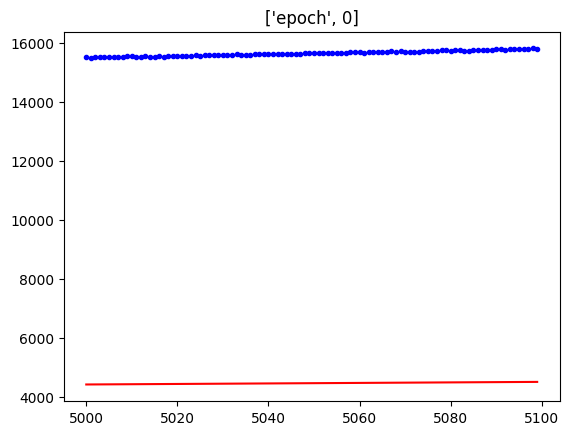

epoch is: 20, loss is 17104286.0,  W is: [[2.321542]], b is [1.0003079]


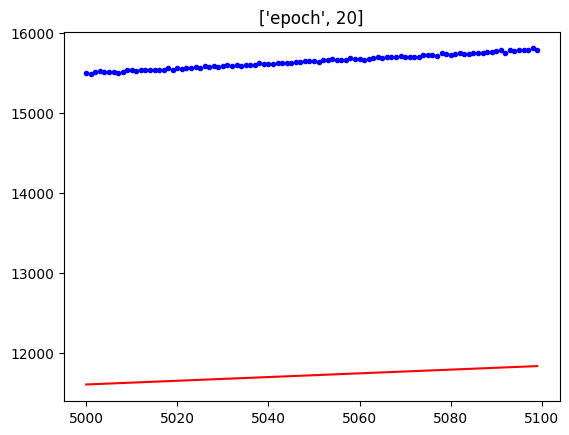

epoch is: 40, loss is 2107804.25,  W is: [[2.8259504]], b is [1.0004076]


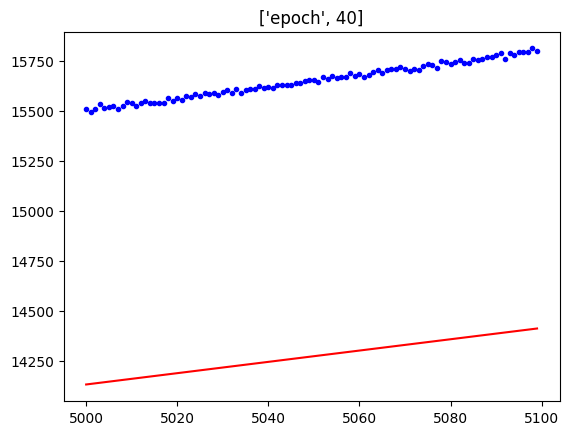

epoch is: 60, loss is 259810.125,  W is: [[3.0030174]], b is [1.0004427]


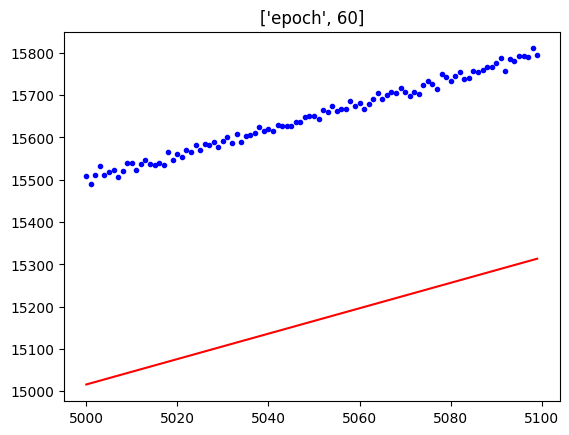

epoch is: 80, loss is 32084.33203125,  W is: [[3.0651748]], b is [1.0004551]


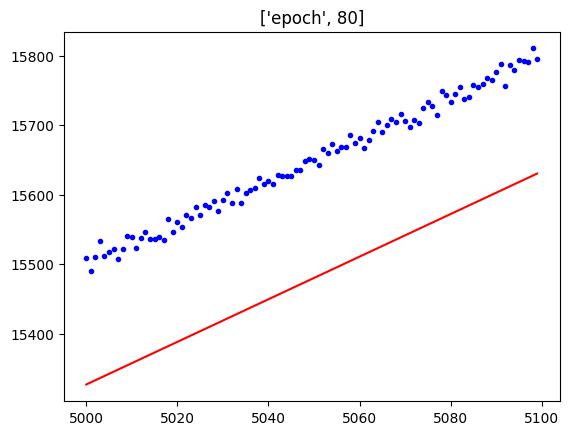

epoch is: 100, loss is 4021.863037109375,  W is: [[3.0869946]], b is [1.0004594]


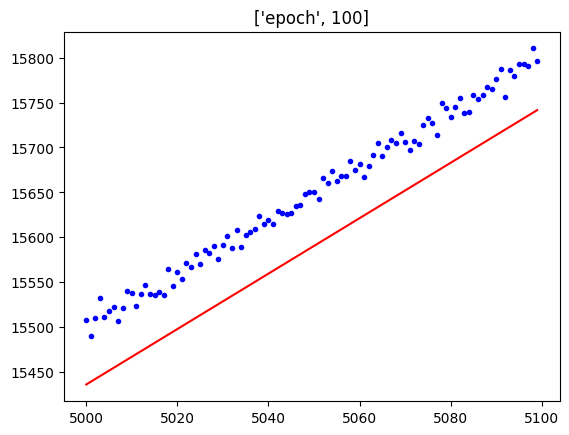

epoch is: 120, loss is 563.811279296875,  W is: [[3.0946543]], b is [1.0004611]


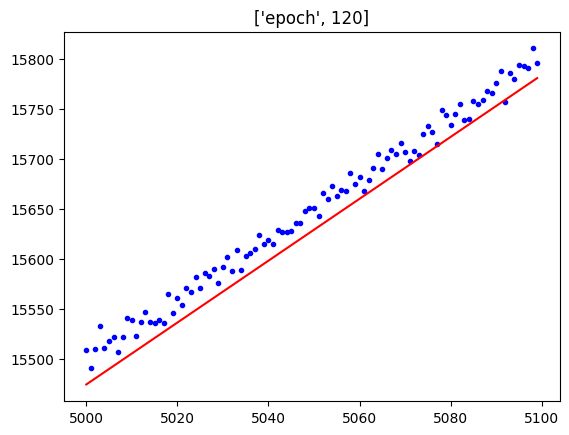

epoch is: 140, loss is 137.7175750732422,  W is: [[3.0973427]], b is [1.0004611]


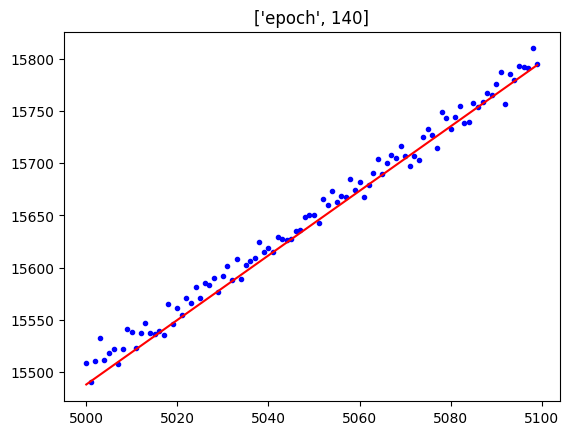

epoch is: 160, loss is 85.17903137207031,  W is: [[3.0982869]], b is [1.0004611]


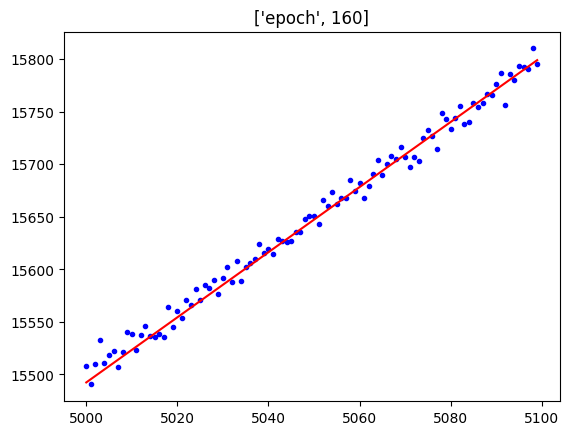

epoch is: 180, loss is 78.70682525634766,  W is: [[3.0986183]], b is [1.0004611]


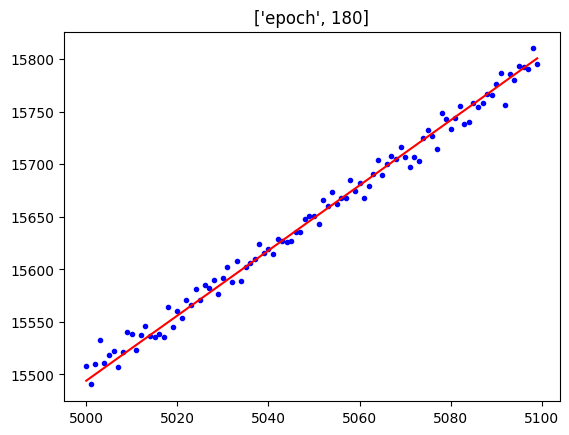

In [12]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%20 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

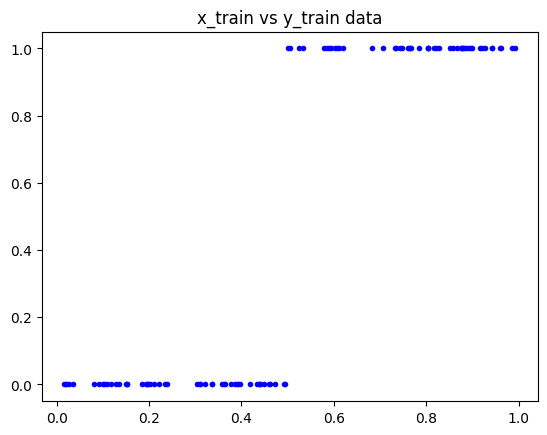

In [13]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [14]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  21.27017593383789,  W : [[1.0794374]], b  [-0.62300986]
epoch : 1, loss  18.77874183654785,  W : [[1.6342227]], b  [-0.5371071]
epoch : 2, loss  16.858755111694336,  W : [[1.8348331]], b  [-0.99129355]
epoch : 3, loss  15.282841682434082,  W : [[2.2701094]], b  [-0.9461445]
epoch : 4, loss  14.016131401062012,  W : [[2.4539473]], b  [-1.2846452]
epoch : 5, loss  12.9623441696167,  W : [[2.7900062]], b  [-1.2869008]
epoch : 6, loss  12.098295211791992,  W : [[2.9700296]], b  [-1.5206541]
epoch : 7, loss  11.3753662109375,  W : [[3.2265599]], b  [-1.5702946]
epoch : 8, loss  10.768972396850586,  W : [[3.4042332]], b  [-1.7253534]
epoch : 9, loss  10.252056121826172,  W : [[3.606344]], b  [-1.8024026]
epoch : 10, loss  9.805987358093262,  W : [[3.7746851]], b  [-1.9122192]
epoch : 11, loss  9.416253089904785,  W : [[3.943579]], b  [-1.9954991]
epoch : 12, loss  9.072336196899414,  W : [[4.097696]], b  [-2.0833378]
epoch : 13, loss  8.766338348388672,  W : [[4.245763]], b 

Plotting

epoch is: 0, loss is 22.169151306152344,  W is: [[0.9213933]], b is [-0.39641628]


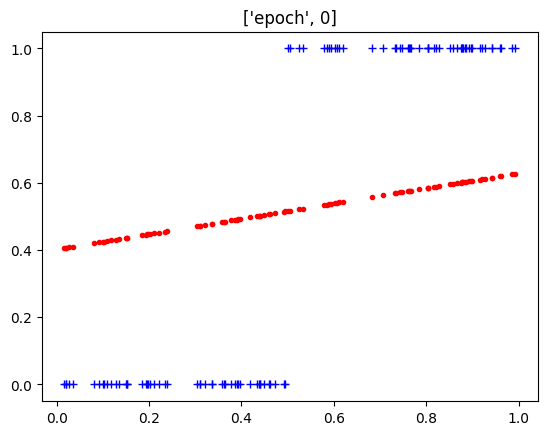

epoch is: 40, loss is 5.563823223114014,  W is: [[6.6740317]], b is [-3.463855]


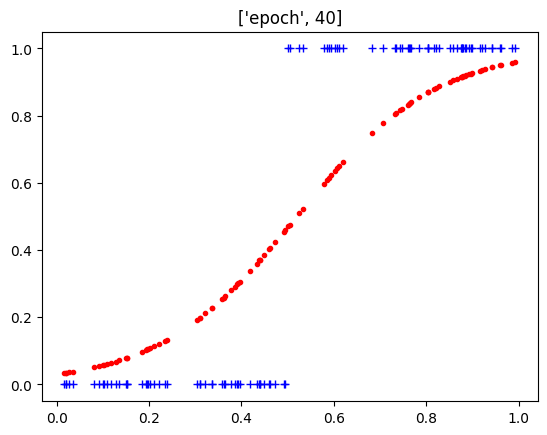

epoch is: 80, loss is 4.329034328460693,  W is: [[8.603697]], b is [-4.4667935]


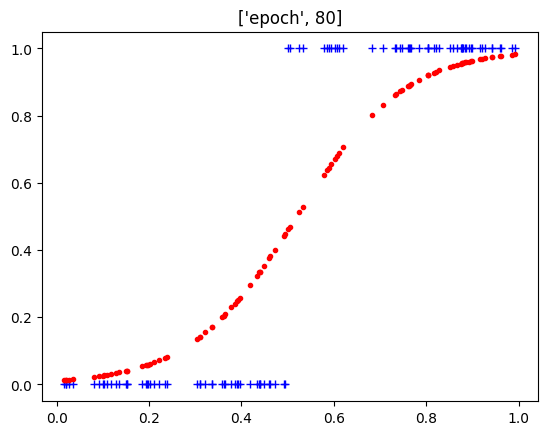

epoch is: 120, loss is 3.776824712753296,  W is: [[9.916095]], b is [-5.1354156]


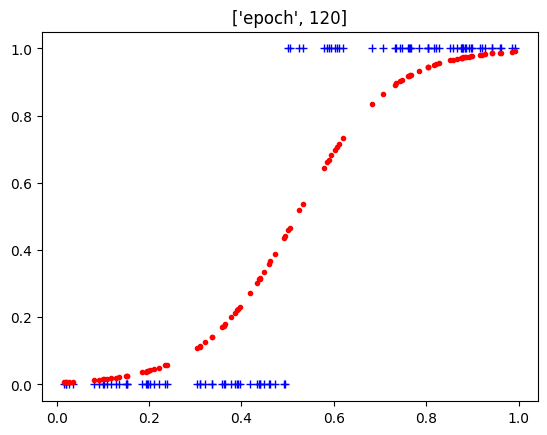

epoch is: 160, loss is 3.436791181564331,  W is: [[10.951776]], b is [-5.6578817]


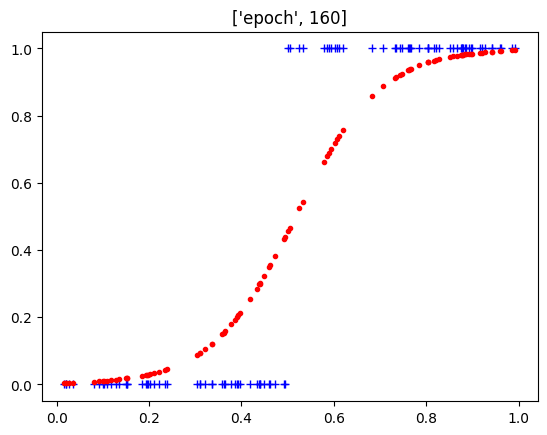

epoch is: 200, loss is 3.1965270042419434,  W is: [[11.824691]], b is [-6.0958943]


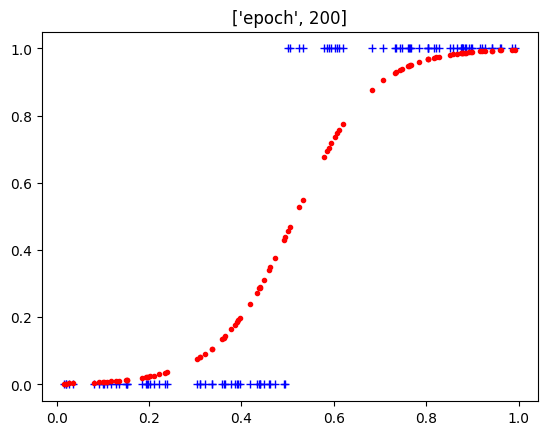

epoch is: 240, loss is 3.0133707523345947,  W is: [[12.587974]], b is [-6.477714]


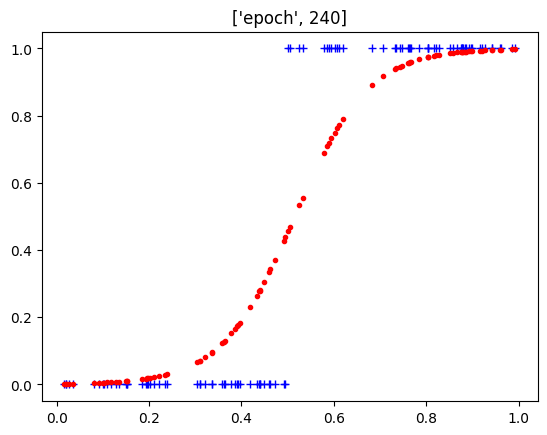

epoch is: 280, loss is 2.866912364959717,  W is: [[13.271149]], b is [-6.818816]


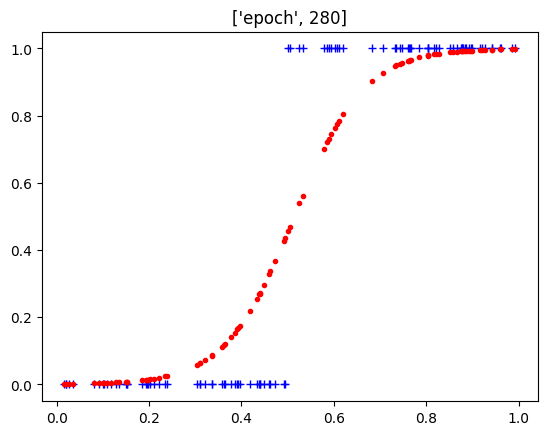

In [15]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [35]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


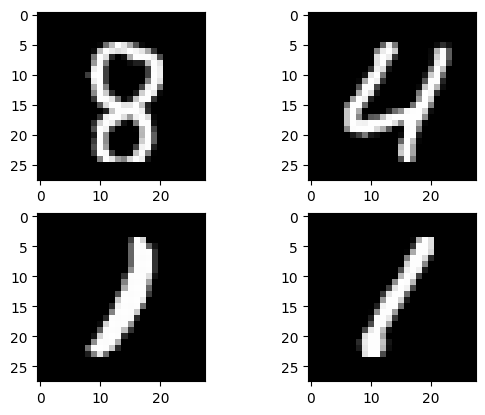

In [36]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[188], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[64], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[78], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[59], cmap=plt.get_cmap('gray'))
5000
# show the plot
plt.show()

In [43]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
#model.add(layers.Dense(300, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
#model.add(layers.Dense(50, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9855 - loss: 0.1723 - val_accuracy: 0.7477 - val_loss: 0.8375
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9873 - loss: 0.1601 - val_accuracy: 0.7462 - val_loss: 0.8399
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9823 - loss: 0.1554 - val_accuracy: 0.7490 - val_loss: 0.8351
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9784 - loss: 0.1539 - val_accuracy: 0.7498 - val_loss: 0.8366
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9924 - loss: 0.1313 - val_accuracy: 0.7507 - val_loss: 0.8322
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9894 - loss: 0.1185 - val_accuracy: 0.7531 - val_loss: 0.8245
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9784 - loss: 0.1182 - val_accuracy: 0.7517 - val_loss: 0.8321
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9901 - loss: 0.1045 - val_accuracy: 0.7508 - val_loss: 0.8320

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>],
       dtype=object))

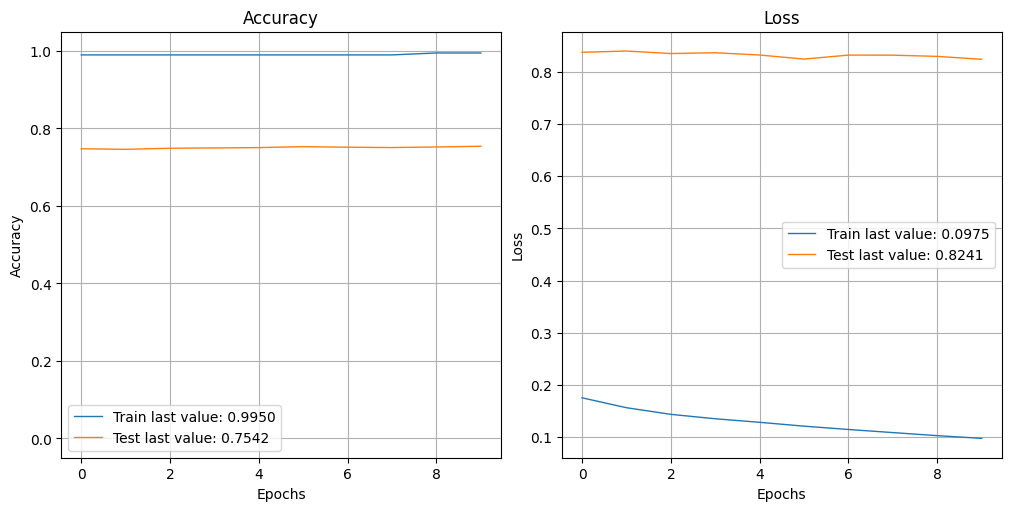

In [47]:
import plot_keras_history

# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
history = model.fit(x_train[:200], y_train[:200], epochs=10, validation_data=(x_test, y_test))
plot_keras_history.plot_history(history)
# Plotting the loss and accuracy

In [21]:
#print(model.get_weights())

In [22]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 0s - 880us/step - accuracy: 0.9795 - loss: 0.0719
Test Accuracy: 97.95%


In [23]:
5000

5000